# **MNIST Digit Clustering**

____________________

## **Context**
____________________

In this case study we will work on the **MNIST** dataset and will **cluster the images in six groups** using the **t-SNE** dimensionality reduction technique. We'll also identify and visualize the clusters using the **K-Mean** algorithm.

**Note:** We will use the datasets module of the sklearn library to load the data and will only consider 6 classes, i.e., **digits from 0 to 5**.

## **Importing the libraries**

In [1]:
#from time import time

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import offsetbox

from sklearn import manifold, datasets, decomposition

import warnings
warnings.filterwarnings('ignore')    # To get rid of warning messages

from sklearn.cluster import KMeans 

## **Loading the dataset**

In [2]:
digits = datasets.load_digits(n_class = 6)    # Loading dataset

X = digits.data

y = digits.target

n_samples, n_features = X.shape

In [3]:
X.shape   

(1083, 64)

**Observation:** 

- X has **1083 different images** each one with **64 dimensions.**

## **Visualizing the data**

Let's reduce the number of dimensions of the images, from **64 to 2** using t-SNE in order to visualize the distribution of images in 2 dimensions.

In [4]:
print("Computing t-SNE")

tsne = manifold.TSNE(n_components = 2, init = 'pca') 

X_tsne = tsne.fit_transform(X)

print(X_tsne)

Computing t-SNE
[[ 14.40119   -45.512806 ]
 [  6.7519484  33.427357 ]
 [ -4.916854   31.240572 ]
 ...
 [ 34.3343     12.247439 ]
 [ 35.856583   10.5733795]
 [ 24.393635  -34.83465  ]]


Let's plot the embeddings.

In [5]:
def scatter(X, title = None):
    x1 = []
    
    x2 = []
    
    plt.figure(figsize = (10, 10))
    
    plt.title(title)
    
    for i in X:
        x1.append(i[0])
        
        x2.append(i[1])
    
    sns.scatterplot(x = x1, y = x2)
    
    plt.show()

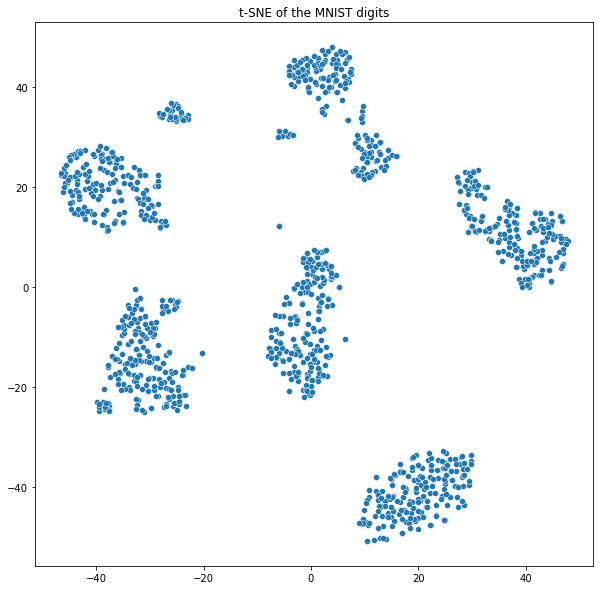

In [6]:
scatter(X_tsne, "t-SNE of the MNIST digits")

Let's use the **K-mean** algorithm to get the data grouped into clusters for visualization purposes. The clusters will still appear in the same way.

In [7]:
import pandas as pd

df = pd.DataFrame(X_tsne)

df.columns = ['X1', 'X2']

df

,X1,X2
0,14.401190,-45.512806
1,6.751948,33.427357
2,-4.916854,31.240572
3,-27.034986,-20.355759
4,29.712383,12.143716
...,...,...
1078,-3.750944,-13.168622
1079,2.533379,-15.645097
1080,34.334301,12.247439
1081,35.856583,10.573380


## **Scaling the data**

In [8]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X_tsne)

## **K-Means**

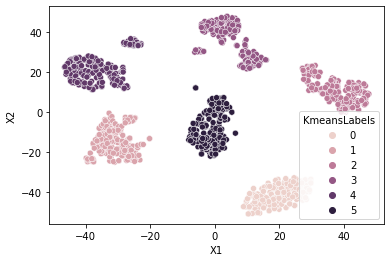

In [9]:
kmeans = KMeans(n_clusters = 6)

kmeans.fit(X)

df['KmeansLabels'] = kmeans.predict(X)

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'KmeansLabels')

plt.show()

### **Comments**

- The K-means clustering algorithm was able to identify the digit clusters in the data.

## **Results and Conclusion**

- We have effectively reduced the dimensionality of the images, from 64 to 2, using t-SNE and plotted the 2D embeddings.
- K-mean algorithm is good for clustering well differenciated data with no outliers.
- It's very useful to combine a dimensionality reduction algorithm (like t-SNE) with K-mean in order to cluster and visualize complex data.